In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 134MB/s] 


Epoch 1/20, Loss: 0.08110063880681992
Epoch 2/20, Loss: 0.03982533648610115
Epoch 3/20, Loss: 0.02508970469236374
Epoch 4/20, Loss: 0.018802378475666046
Epoch 5/20, Loss: 0.013248990420252085
Epoch 6/20, Loss: 0.010373997334390879
Epoch 7/20, Loss: 0.008241610638797282
Epoch 8/20, Loss: 0.007635768949985505
Epoch 9/20, Loss: 0.007683458961546421
Epoch 10/20, Loss: 0.006568746510893107
Epoch 11/20, Loss: 0.005769404638558626
Epoch 12/20, Loss: 0.0053601611498743295
Epoch 13/20, Loss: 0.005023382622748613
Epoch 14/20, Loss: 0.00567297825589776
Epoch 15/20, Loss: 0.004690459305420518
Epoch 16/20, Loss: 0.005275740874931216
Epoch 17/20, Loss: 0.005314892074093223
Epoch 18/20, Loss: 0.0052877582982182505
Epoch 19/20, Loss: 0.004854804938659072
Epoch 20/20, Loss: 0.004560296181589365


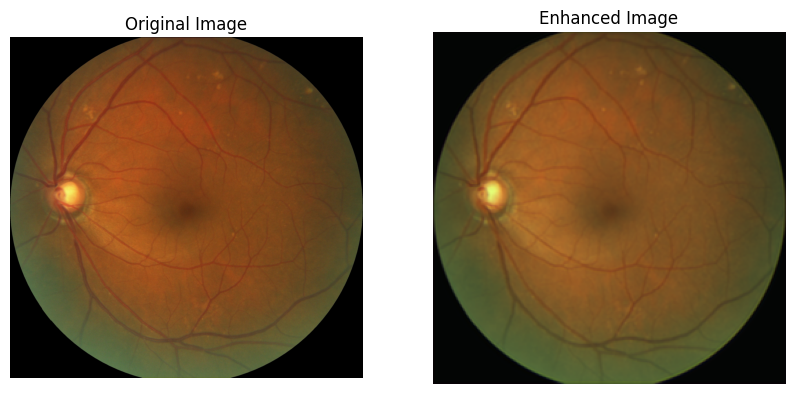

Enhanced image saved as '/content/enhanced_output.png'
Enhanced image also saved to '/content/drive/MyDrive/Refuge/enhanced_output.png'


In [3]:
# Install required libraries in Colab
!pip install opencv-python torch torchvision pillow matplotlib

# Import libraries
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive
from torch.utils.data import Dataset, DataLoader
from torchvision.models import vgg16

# Mount Google Drive
drive.mount('/content/drive')

# Define dataset path in Google Drive
dataset_path = "/content/drive/MyDrive/Refuge/REFUGE2/train/images"
high_quality_dir = "/content/drive/MyDrive/Refuge/REFUGE2/train/high_quality"
low_quality_dir = "/content/drive/MyDrive/Refuge/REFUGE2/train/low_quality"

# Function to load a single image from the dataset
def load_single_image(folder):
    for filename in os.listdir(folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            return img
    raise FileNotFoundError("No valid image found in the folder!")

# Degradation functions (simplified)
def apply_light_transmission_disturbance(img):
    alpha = np.random.uniform(0.8, 1.2)
    beta = np.random.uniform(-20, 20)
    img_degraded = img.astype(float) * alpha + beta
    return np.clip(img_degraded, 0, 255).astype(np.uint8)

def apply_image_blurring(img):
    kernel_size = 5
    img_blurred = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    return img_blurred

def apply_retinal_artifacts(img):
    h, w, c = img.shape
    num_artifacts = np.random.randint(5, 10)
    img_degraded = img.copy()
    for _ in range(num_artifacts):
        x, y = np.random.randint(0, w), np.random.randint(0, h)
        radius = np.random.randint(5, 15)
        cv2.circle(img_degraded, (x, y), radius, (128, 128, 128), -1)
    return img_degraded

def degrade_image(img):
    img_degraded = apply_light_transmission_disturbance(img)
    img_degraded = apply_image_blurring(img_degraded)
    img_degraded = apply_retinal_artifacts(img_degraded)
    return img_degraded

# Generate paired dataset
def generate_paired_dataset(num_images=50):  # Increased to 50 images
    os.makedirs(high_quality_dir, exist_ok=True)
    os.makedirs(low_quality_dir, exist_ok=True)
    images = []
    for filename in os.listdir(dataset_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(dataset_path, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append((filename, img))
            if len(images) >= num_images:
                break

    for i, (filename, img) in enumerate(images):
        degraded_img = degrade_image(img)
        cv2.imwrite(os.path.join(high_quality_dir, f"image_{i}.png"), cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
        cv2.imwrite(os.path.join(low_quality_dir, f"image_{i}.png"), cv2.cvtColor(degraded_img, cv2.COLOR_RGB2BGR))

# Custom Dataset for paired images
class FundusDataset(Dataset):
    def __init__(self, high_quality_dir, low_quality_dir, transform=None):
        self.hq_dir = high_quality_dir
        self.lq_dir = low_quality_dir
        self.transform = transform
        self.images = [f for f in os.listdir(high_quality_dir) if f.endswith('.png')]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        hq_img = cv2.imread(os.path.join(self.hq_dir, self.images[idx]))
        lq_img = cv2.imread(os.path.join(self.lq_dir, self.images[idx]))
        hq_img = cv2.cvtColor(hq_img, cv2.COLOR_BGR2RGB)
        lq_img = cv2.cvtColor(lq_img, cv2.COLOR_BGR2RGB)

        if self.transform:
            hq_img = self.transform(hq_img)
            lq_img = self.transform(lq_img)
        return lq_img, hq_img

# LQA Module
class LQAModule(nn.Module):
    def __init__(self):
        super(LQAModule, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 16, 3, padding=1)
        self.conv3 = nn.Conv2d(16, 3, 3, padding=1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        attention_map = self.sigmoid(self.conv3(x))
        return attention_map

# RSA Module
class RSAModule(nn.Module):
    def __init__(self):
        super(RSAModule, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 16, 3, padding=1)
        self.conv3 = nn.Conv2d(16, 3, 3, padding=1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        structure_map = self.sigmoid(self.conv3(x))
        return structure_map

# Simplified cofe-Net with deeper architecture
class CofeNet(nn.Module):
    def __init__(self):
        super(CofeNet, self).__init__()
        self.lqa = LQAModule()
        self.rsa = RSAModule()
        # Deeper enhancer network
        self.enhancer = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 64, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 32, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 3, 3, padding=1),
        )

    def forward(self, x):
        lqa_map = self.lqa(x)
        rsa_map = self.rsa(x)
        # Softer blending to preserve input details
        x_adjusted = x + (rsa_map - lqa_map) * 0.1  # Reduced weight to 0.1
        enhanced = self.enhancer(x_adjusted)
        enhanced = (enhanced - enhanced.min()) / (enhanced.max() - enhanced.min() + 1e-8)
        return enhanced

# Perceptual Loss using VGG
class PerceptualLoss(nn.Module):
    def __init__(self):
        super(PerceptualLoss, self).__init__()
        vgg = vgg16(pretrained=True).features[:16].eval()  # Use layers up to relu4_1
        for param in vgg.parameters():
            param.requires_grad = False
        self.vgg = vgg
        self.criterion = nn.MSELoss()

    def forward(self, x, y):
        x_vgg = self.vgg(x)
        y_vgg = self.vgg(y)
        return self.criterion(x_vgg, y_vgg)

# Training function with perceptual loss
def train_model(model, train_loader, epochs=20):  # Increased epochs
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    mse_loss = nn.MSELoss()
    perceptual_loss = PerceptualLoss().to(device)

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for lq_img, hq_img in train_loader:
            lq_img, hq_img = lq_img.to(device), hq_img.to(device)
            optimizer.zero_grad()
            output = model(lq_img)
            # Combined loss: MSE + Perceptual
            loss_mse = mse_loss(output, hq_img)
            loss_perceptual = perceptual_loss(output, hq_img)
            loss = loss_mse + 0.1 * loss_perceptual  # Weight as per paper (lambda_p=10, lambda_c=1)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader)}")
    torch.save(model.state_dict(), "/content/cofenet_trained.pth")

# Main function to process and enhance an image
def enhance_image(image_path=None):
    clear_gpu_memory()

    # Load image
    if image_path is None:
        img = load_single_image(dataset_path)
    else:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Preprocess image
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((256, 256)),
        transforms.ToTensor()
    ])
    img_tensor = transform(img).unsqueeze(0)

    # Generate paired dataset for training
    print("Generating paired dataset...")
    generate_paired_dataset(num_images=50)

    # Load dataset for training
    train_dataset = FundusDataset(high_quality_dir, low_quality_dir, transform=transform)
    train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

    # Initialize and train model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = CofeNet()
    print("Training model...")
    train_model(model, train_loader, epochs=20)

    # Switch to evaluation mode
    try:
        model = model.to(device)
        img_tensor = img_tensor.to(device)
    except RuntimeError as e:
        print(f"GPU error: {e}. Switching to CPU.")
        device = torch.device("cpu")
        model = model.to(device)
        img_tensor = img_tensor.to(device)

    model.eval()

    # Enhance image
    with torch.no_grad():
        enhanced_tensor = model(img_tensor)

    # Convert back to numpy
    enhanced_img = enhanced_tensor.squeeze(0).cpu().numpy()
    enhanced_img = np.transpose(enhanced_img, (1, 2, 0))
    enhanced_img = (enhanced_img * 255).astype(np.uint8)

    # Display images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(img)
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.title("Enhanced Image")
    plt.imshow(enhanced_img)
    plt.axis("off")
    plt.show()

    # Save enhanced image
    cv2.imwrite("/content/enhanced_output.png", cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2BGR))
    print("Enhanced image saved as '/content/enhanced_output.png'")

    drive_output_path = "/content/drive/MyDrive/Refuge/enhanced_output.png"
    cv2.imwrite(drive_output_path, cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2BGR))
    print(f"Enhanced image also saved to '{drive_output_path}'")

# Clear GPU memory
def clear_gpu_memory():
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    print("GPU memory cleared (if applicable)")

# Run the enhancement
enhance_image()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
GPU memory cleared (if applicable)


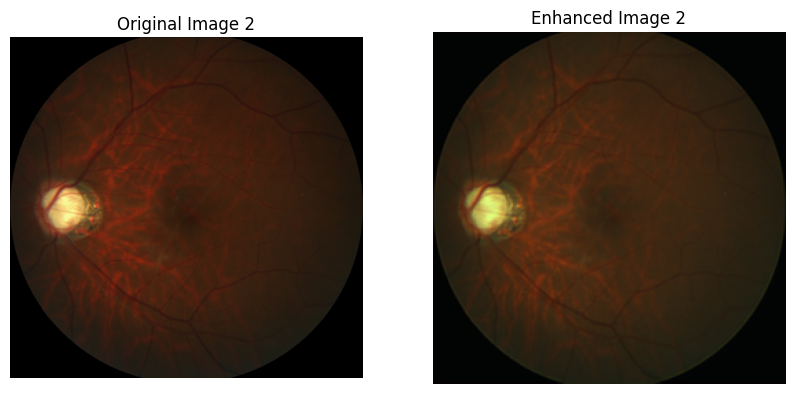

Enhanced image 2 saved as '/content/enhanced_output_1.png'
Enhanced image 2 also saved to '/content/drive/MyDrive/Refuge/enhanced_output_1.png'


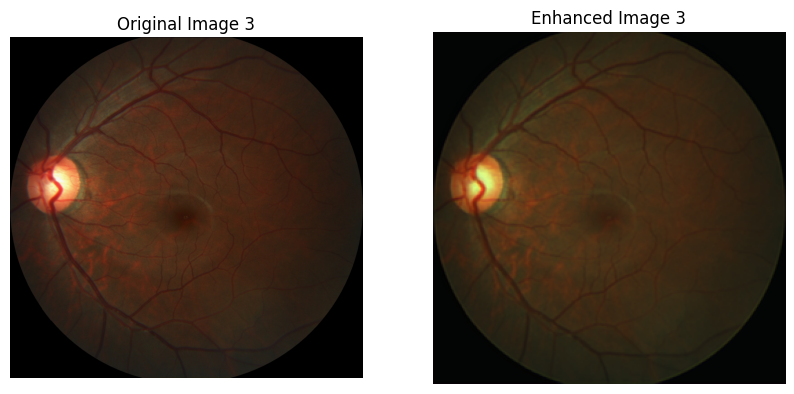

Enhanced image 3 saved as '/content/enhanced_output_2.png'
Enhanced image 3 also saved to '/content/drive/MyDrive/Refuge/enhanced_output_2.png'


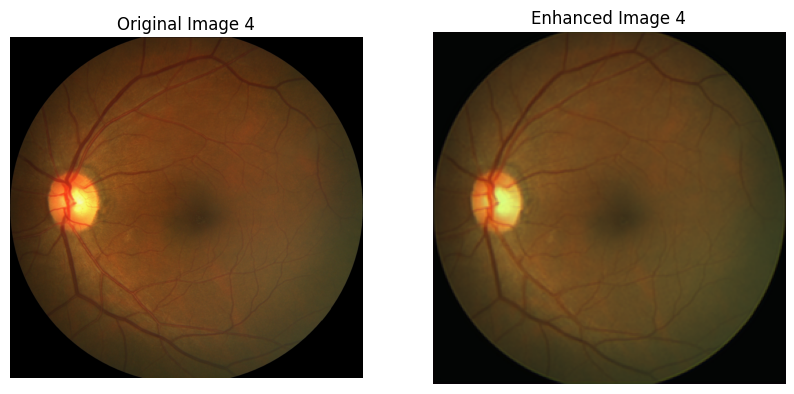

Enhanced image 4 saved as '/content/enhanced_output_3.png'
Enhanced image 4 also saved to '/content/drive/MyDrive/Refuge/enhanced_output_3.png'


In [4]:
# Import libraries (already imported in your previous block, but included for completeness)
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive (already mounted, but included for safety)
drive.mount('/content/drive')

# Define dataset path in Google Drive
dataset_path = "/content/drive/MyDrive/Refuge/REFUGE2/train/images"

# Function to load multiple images from the dataset
def load_multiple_images(folder, num_images=3, start_index=0):
    images = []
    count = 0
    for i, filename in enumerate(os.listdir(folder)):
        if i < start_index:
            continue
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
            count += 1
            if count >= num_images:
                break
    if not images:
        raise FileNotFoundError("No valid images found in the folder!")
    return images

# LQA Module (same as in your original code)
class LQAModule(nn.Module):
    def __init__(self):
        super(LQAModule, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 16, 3, padding=1)
        self.conv3 = nn.Conv2d(16, 3, 3, padding=1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        attention_map = self.sigmoid(self.conv3(x))
        return attention_map

# RSA Module (same as in your original code)
class RSAModule(nn.Module):
    def __init__(self):
        super(RSAModule, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 16, 3, padding=1)
        self.conv3 = nn.Conv2d(16, 3, 3, padding=1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        structure_map = self.sigmoid(self.conv3(x))
        return structure_map

# Simplified cofe-Net (same as in your original code)
class CofeNet(nn.Module):
    def __init__(self):
        super(CofeNet, self).__init__()
        self.lqa = LQAModule()
        self.rsa = RSAModule()
        self.enhancer = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 64, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 32, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 3, 3, padding=1),
        )

    def forward(self, x):
        lqa_map = self.lqa(x)
        rsa_map = self.rsa(x)
        x_adjusted = x + (rsa_map - lqa_map) * 0.1
        enhanced = self.enhancer(x_adjusted)
        enhanced = (enhanced - enhanced.min()) / (enhanced.max() - enhanced.min() + 1e-8)
        return enhanced

# Clear GPU memory
def clear_gpu_memory():
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    print("GPU memory cleared (if applicable)")

# Function to enhance and display multiple images
def display_more_images(num_images=3, start_index=1):
    clear_gpu_memory()

    # Load multiple images (starting from start_index to avoid the first image)
    images = load_multiple_images(dataset_path, num_images=num_images, start_index=start_index)

    # Preprocess images
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((256, 256)),
        transforms.ToTensor()
    ])

    # Initialize model and load trained weights
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = CofeNet()
    try:
        model.load_state_dict(torch.load("/content/cofenet_trained.pth"))
        model = model.to(device)
    except FileNotFoundError:
        print("Trained model weights not found at '/content/cofenet_trained.pth'. Please run the training script first.")
        return
    except RuntimeError as e:
        print(f"GPU error: {e}. Switching to CPU.")
        device = torch.device("cpu")
        model = model.to(device)

    model.eval()

    # Enhance each image and display
    for i, img in enumerate(images):
        img_tensor = transform(img).unsqueeze(0)
        img_tensor = img_tensor.to(device)

        with torch.no_grad():
            enhanced_tensor = model(img_tensor)

        # Convert back to numpy
        enhanced_img = enhanced_tensor.squeeze(0).cpu().numpy()
        enhanced_img = np.transpose(enhanced_img, (1, 2, 0))
        enhanced_img = (enhanced_img * 255).astype(np.uint8)

        # Display images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title(f"Original Image {start_index + i + 1}")
        plt.imshow(img)
        plt.axis("off")
        plt.subplot(1, 2, 2)
        plt.title(f"Enhanced Image {start_index + i + 1}")
        plt.imshow(enhanced_img)
        plt.axis("off")
        plt.show()

        # Save enhanced image
        cv2.imwrite(f"/content/enhanced_output_{start_index + i}.png", cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2BGR))
        print(f"Enhanced image {start_index + i + 1} saved as '/content/enhanced_output_{start_index + i}.png'")

        drive_output_path = f"/content/drive/MyDrive/Refuge/enhanced_output_{start_index + i}.png"
        cv2.imwrite(drive_output_path, cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2BGR))
        print(f"Enhanced image {start_index + i + 1} also saved to '{drive_output_path}'")

# Run the function to display more images
display_more_images(num_images=3, start_index=1)  # Start from the second image (index 1)

In [5]:
!pip install scikit-image

GPU memory cleared (if applicable)


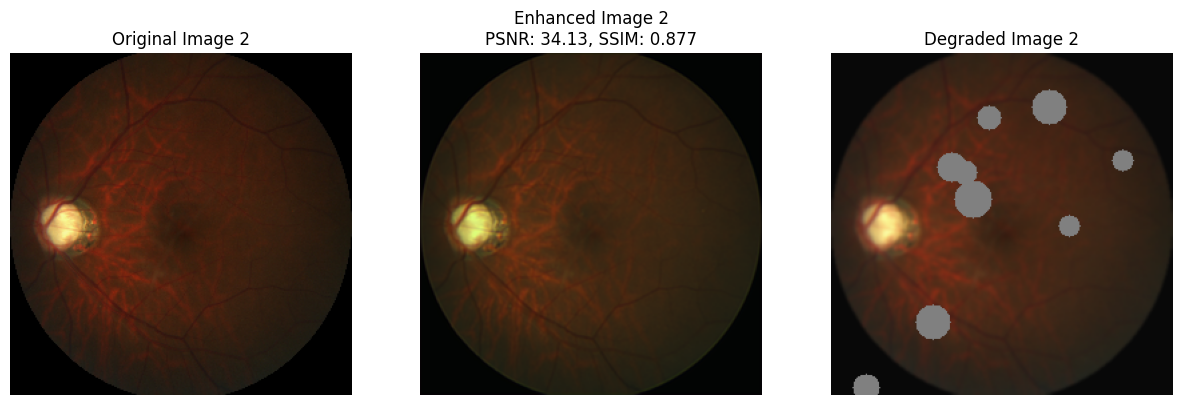

Enhanced image 2 saved as '/content/enhanced_output_1.png'
Enhanced image 2 also saved to '/content/drive/MyDrive/Refuge/enhanced_output_1.png'
Metrics for Image 2: PSNR = 34.13, SSIM = 0.877


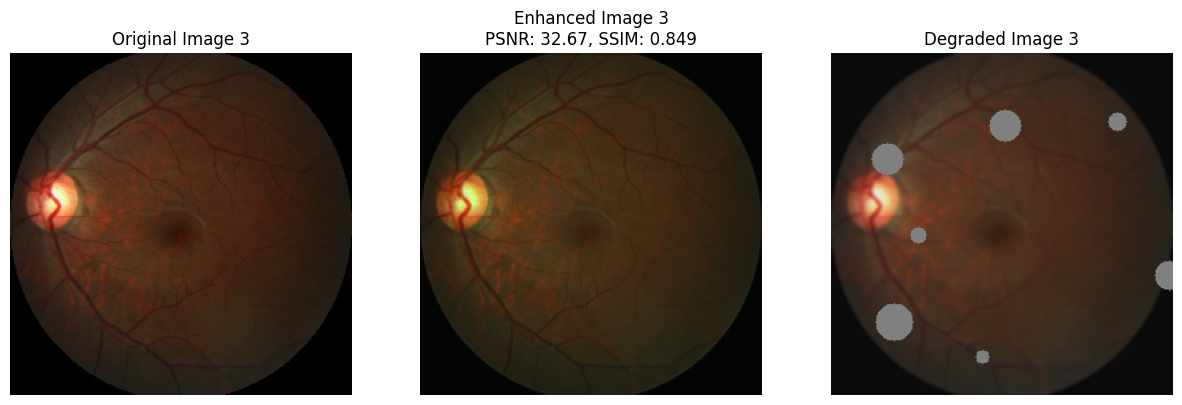

Enhanced image 3 saved as '/content/enhanced_output_2.png'
Enhanced image 3 also saved to '/content/drive/MyDrive/Refuge/enhanced_output_2.png'
Metrics for Image 3: PSNR = 32.67, SSIM = 0.849


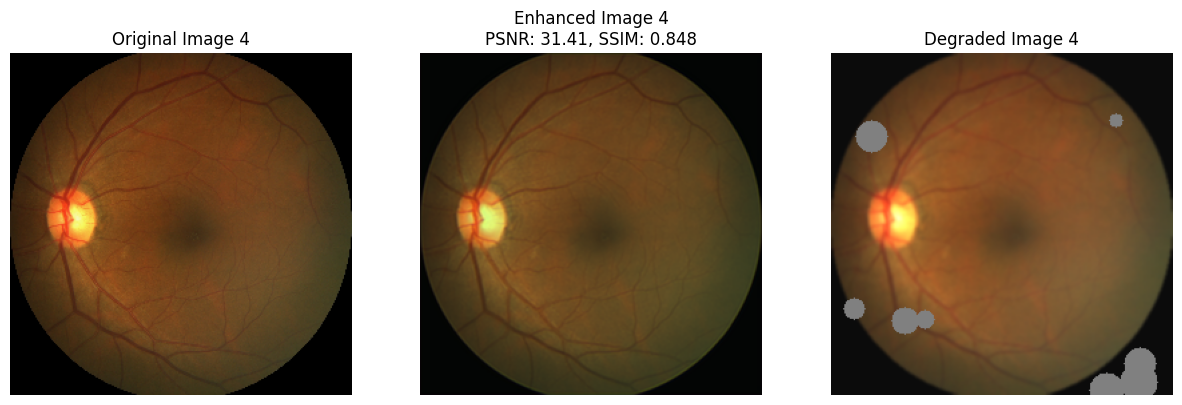

Enhanced image 4 saved as '/content/enhanced_output_3.png'
Enhanced image 4 also saved to '/content/drive/MyDrive/Refuge/enhanced_output_3.png'
Metrics for Image 4: PSNR = 31.41, SSIM = 0.848


In [6]:
# Import additional libraries
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# Function to enhance and display multiple images with performance metrics
def display_more_images(num_images=3, start_index=1):
    clear_gpu_memory()

    # Load multiple images
    images = load_multiple_images(dataset_path, num_images=num_images, start_index=start_index)

    # Preprocess images
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((256, 256)),
        transforms.ToTensor()
    ])

    # Initialize model and load trained weights
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = CofeNet()
    try:
        model.load_state_dict(torch.load("/content/cofenet_trained.pth"))
        model = model.to(device)
    except FileNotFoundError:
        print("Trained model weights not found at '/content/cofenet_trained.pth'. Please run the training script first.")
        return
    except RuntimeError as e:
        print(f"GPU error: {e}. Switching to CPU.")
        device = torch.device("cpu")
        model = model.to(device)

    model.eval()

    # Enhance each image and compute metrics
    for i, img in enumerate(images):
        img_tensor = transform(img).unsqueeze(0)
        img_tensor = img_tensor.to(device)

        with torch.no_grad():
            enhanced_tensor = model(img_tensor)

        # Convert back to numpy
        enhanced_img = enhanced_tensor.squeeze(0).cpu().numpy()
        enhanced_img = np.transpose(enhanced_img, (1, 2, 0))
        enhanced_img = (enhanced_img * 255).astype(np.uint8)

        # Resize original image to match enhanced image for fair comparison
        img_resized = cv2.resize(img, (256, 256))

        # Compute PSNR and SSIM
        psnr_value = psnr(img_resized, enhanced_img, data_range=255)
        ssim_value = ssim(img_resized, enhanced_img, multichannel=True, channel_axis=2, data_range=255)

        # Display images with metrics
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.title(f"Original Image {start_index + i + 1}")
        plt.imshow(img_resized)
        plt.axis("off")
        plt.subplot(1, 3, 2)
        plt.title(f"Enhanced Image {start_index + i + 1}\nPSNR: {psnr_value:.2f}, SSIM: {ssim_value:.3f}")
        plt.imshow(enhanced_img)
        plt.axis("off")

        # Generate and display degraded image for comparison
        degraded_img = degrade_image(img_resized)
        plt.subplot(1, 3, 3)
        plt.title(f"Degraded Image {start_index + i + 1}")
        plt.imshow(degraded_img)
        plt.axis("off")
        plt.show()

        # Save enhanced image
        output_path = f"/content/enhanced_output_{start_index + i}.png"
        cv2.imwrite(output_path, cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2BGR))
        print(f"Enhanced image {start_index + i + 1} saved as '{output_path}'")

        drive_output_path = f"/content/drive/MyDrive/Refuge/enhanced_output_{start_index + i}.png"
        cv2.imwrite(drive_output_path, cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2BGR))
        print(f"Enhanced image {start_index + i + 1} also saved to '{drive_output_path}'")
        print(f"Metrics for Image {start_index + i + 1}: PSNR = {psnr_value:.2f}, SSIM = {ssim_value:.3f}")

# Run the function
display_more_images(num_images=3, start_index=1)